# PREDICT TRIGLYCERIDE LEVELS THOSE  ARE LEY FATCOR IN HEART REALTED PROBLEMS.

Several factors can contribute to an increase in triglyceride levels:

Dietary habits: Consumption of foods high in sugars, refined carbohydrates, and unhealthy fats (such as saturated and trans fats) can raise triglyceride levels. Examples include sugary beverages, sweets, pastries, fried foods, and fatty cuts of meat.
Obesity and excess weight: Being overweight or obese can lead to elevated triglyceride levels. Excess calories, particularly from carbohydrates and unhealthy fats, can be converted into triglycerides and stored in fat cells

Physical inactivity:

Alcohol consumption: Excessive alcohol intake can raise triglyceride levels. Alcohol is metabolized into triglycerides by the liver, leading to increased production and release of triglycerides into the bloodstream.

Smoking: Smoking has been associated with higher triglyceride levels. The exact mechanisms are not fully understood, but smoking may adversely affect lipid metabolism and contribute to dyslipidemia.

Certain medical conditions: Conditions such as uncontrolled diabetes, hypothyroidism, kidney disease, liver disease, and metabolic syndrome can lead to elevated triglyceride levels. These conditions may impair triglyceride metabolism and clearance from the bloodstream.

Genetics: Genetic factors can influence triglyceride levels. Some individuals may have an inherited predisposition to elevated triglycerides due to genetic variations affecting lipid metabolism.

Medications: Certain medications, such as corticosteroids, beta-blockers, diuretics, estrogen, antipsychotics, and some immunosuppressants, can raise triglyceride levels as a side effect.


In [489]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [726]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [491]:
df_train= train.copy()
df_train.head()

,candidate_id,gender,age,height_in_cm,weight_in_lbs,left_eyesight_lvl,right_eyesight_lvl,can_hear_left_ear,can_hear_right_ear,blood_pressure_lvl1,...,bad_cholestrol_lvl,hemoglobin_lvl,urea_lvl,creatinine_lvl,liver_enzyme_lvl1,liver_enzyme_lvl2,smoking_habit,drinking_habit,residential_area,triglyceride_lvl
0,CAN_1,Male,35,170,165.35,1.0,1.0,Slightly Defective,Slightly Defective,120,...,126,17.1,1,1.0,21,35.0,Does not Smoke,Y,Town,92
1,CAN_2,Male,30,180,176.37,0.9,1.2,Slightly Defective,Slightly Defective,130,...,148,15.8,1,0.9,20,36.0,Chain Smoker,N,Urban,121
2,CAN_3,Male,40,165,165.35,1.2,1.5,Slightly Defective,Slightly Defective,120,...,74,15.8,1,0.9,47,32.0,Does not Smoke,N,Rural,104
3,CAN_4,Male,50,175,176.37,1.5,1.2,Slightly Defective,Slightly Defective,145,...,104,17.6,1,1.1,29,34.0,Does not Smoke,N,Town,106
4,CAN_5,Male,50,165,132.28,1.0,1.2,Slightly Defective,Slightly Defective,138,...,117,13.8,1,0.8,19,12.0,Does not Smoke,N,Urban,104


In [492]:
#df_test_data = pd.read_csv('test.csv')

In [493]:
df_test.head()

,gender,age,height_in_cm,weight_in_lbs,left_eyesight_lvl,right_eyesight_lvl,blood_pressure_lvl1,blood_pressure_lvl2,glucose_lvl,total_cholestrol,good_cholestrol_lvl,bad_cholestrol_lvl,hemoglobin_lvl,urea_lvl,creatinine_lvl,liver_enzyme_lvl1,liver_enzyme_lvl2,smoking_habit,drinking_habit,residential_area
0,Female,50,155,121.25,1.2,0.9,140.0,90.0,121.0,230.0,48.0,158.0,14.0,1.0,0.7,16.0,13.0,Does not Smoke,N,Urban
1,Female,40,165,132.28,1.0,0.9,135.0,77.0,122.0,167.0,83.0,68.0,15.1,1.0,0.7,14.0,16.0,Does not Smoke,Y,Town
2,Female,40,155,99.21,0.9,1.2,100.0,70.0,92.0,160.0,73.0,78.0,10.8,1.0,0.6,17.0,9.0,Does not Smoke,N,Town
3,Male,50,175,176.37,1.5,1.5,128.0,80.0,122.0,171.0,47.0,80.0,15.6,1.0,1.0,25.0,47.0,Occassionaly Smokes,Y,Rural
4,Male,45,180,143.30,1.0,1.0,130.0,80.0,104.0,160.0,66.0,55.0,14.9,1.0,1.1,32.0,17.0,Chain Smoker,Y,Town


In [494]:
df_train.columns


Index(['candidate_id', 'gender', 'age', 'height_in_cm', 'weight_in_lbs',
       'left_eyesight_lvl', 'right_eyesight_lvl', 'can_hear_left_ear',
       'can_hear_right_ear', 'blood_pressure_lvl1', 'blood_pressure_lvl2',
       'glucose_lvl', 'total_cholestrol', 'good_cholestrol_lvl',
       'bad_cholestrol_lvl', 'hemoglobin_lvl', 'urea_lvl', 'creatinine_lvl',
       'liver_enzyme_lvl1', 'liver_enzyme_lvl2', 'smoking_habit',
       'drinking_habit', 'residential_area', 'triglyceride_lvl'],
      dtype='object')

In [495]:
df_train.describe()

,age,height_in_cm,weight_in_lbs,left_eyesight_lvl,right_eyesight_lvl,blood_pressure_lvl1,blood_pressure_lvl2,glucose_lvl,total_cholestrol,good_cholestrol_lvl,bad_cholestrol_lvl,hemoglobin_lvl,urea_lvl,creatinine_lvl,liver_enzyme_lvl1,liver_enzyme_lvl2,triglyceride_lvl
count,22400.000000,22400.000000,22400.000000,22400.000000,22400.000000,22400.000000,22400.000000,22400.000000,22400.000000,22400.000000,22400.000000,22400.000000,22400.000000,22400.000000,22400.000000,20850.000000,22400.000000
mean,47.586607,162.689286,139.644081,0.982098,0.978196,122.561473,76.120491,100.578304,195.399554,57.216250,113.063616,14.239942,1.097321,0.859469,25.824598,25.636259,130.173438
std,14.167025,9.710639,27.550786,0.613311,0.590100,14.581722,9.921338,24.334669,39.042778,55.983373,47.987373,1.563570,0.445315,0.292106,14.968670,20.521723,84.361161
min,20.000000,125.000000,66.140000,0.100000,0.100000,75.000000,42.000000,51.000000,54.000000,4.000000,1.000000,8.100000,1.000000,0.100000,4.000000,2.000000,1.000000
25%,35.000000,155.000000,121.250000,0.700000,0.700000,112.000000,70.000000,88.000000,169.000000,46.000000,89.000000,13.200000,1.000000,0.700000,19.000000,15.000000,73.000000
50%,45.000000,165.000000,132.280000,1.000000,1.000000,121.000000,76.000000,96.000000,193.000000,55.000000,111.000000,14.300000,1.000000,0.800000,23.000000,20.000000,107.000000
75%,60.000000,170.000000,154.320000,1.200000,1.200000,131.000000,82.000000,105.000000,219.000000,66.000000,135.000000,15.400000,1.000000,1.000000,28.000000,30.000000,159.000000
max,85.000000,200.000000,286.600000,9.900000,9.900000,230.000000,160.000000,468.000000,1619.000000,8110.000000,5119.000000,18.000000,6.000000,16.400000,911.000000,659.000000,500.000000


In [496]:
#total_cholestrol	good_cholestrol_lvl	bad_cholestrol_lvl	hemoglobin_lvl	urea_lvl	creatinine_lvl	liver_enzyme_lvl1	liver_enzyme_lvl2

In [497]:
#check missing values
df_train.columns[df_train.isnull().any()]

Index(['liver_enzyme_lvl2', 'smoking_habit', 'drinking_habit'], dtype='object')

In [498]:
miss = df_train.isnull().sum()/len(df_train)
miss = miss[miss > 0]
miss.sort_values(inplace=True)
miss

drinking_habit       0.066607
smoking_habit        0.067455
liver_enzyme_lvl2    0.069196
dtype: float64

In [499]:
df_train.isnull().sum()

candidate_id              0
gender                    0
age                       0
height_in_cm              0
weight_in_lbs             0
left_eyesight_lvl         0
right_eyesight_lvl        0
can_hear_left_ear         0
can_hear_right_ear        0
blood_pressure_lvl1       0
blood_pressure_lvl2       0
glucose_lvl               0
total_cholestrol          0
good_cholestrol_lvl       0
bad_cholestrol_lvl        0
hemoglobin_lvl            0
urea_lvl                  0
creatinine_lvl            0
liver_enzyme_lvl1         0
liver_enzyme_lvl2      1550
smoking_habit          1511
drinking_habit         1492
residential_area          0
triglyceride_lvl          0
dtype: int64

# Data continas missing values in catgorical varibles

In [500]:
df_train['triglyceride_lvl'].describe()

count    22400.000000
mean       130.173438
std         84.361161
min          1.000000
25%         73.000000
50%        107.000000
75%        159.000000
max        500.000000
Name: triglyceride_lvl, dtype: float64

# it seems to over 75 % values fall under 160

<Axes: xlabel='triglyceride_lvl', ylabel='Density'>

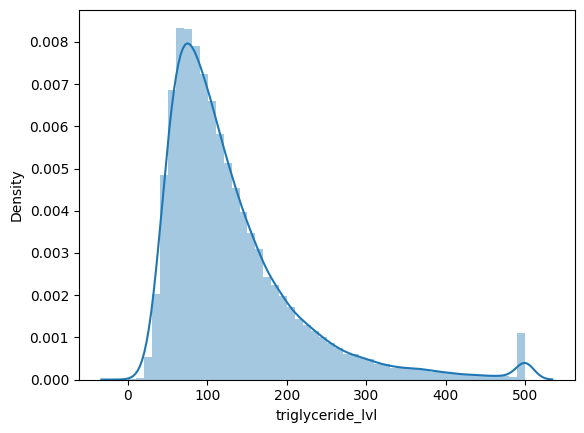

In [501]:
sns.distplot(df_train['triglyceride_lvl'])

# Target varible having outliers

# We see that the target variable triglyceride has a right-skewed distribution.

In [502]:
Q1 = df_train['triglyceride_lvl'].quantile(0.25)
Q3 = df_train['triglyceride_lvl'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 2 * IQR
upper_bound = Q3 + 2 * IQR

# Drop outliers
print ("before droping putliers",train.shape)
df_train = df_train[(df_train['triglyceride_lvl'] >= lower_bound) & (df_train['triglyceride_lvl'] <= upper_bound)]
print ("after droping putliers",df_filtered.shape)

before droping putliers (22400, 24)
after droping putliers (21571, 24)


In [503]:
# print("Highest allowed",df_train['triglyceride_lvl'].mean() + 3*df_train['triglyceride_lvl'].std())
# print("Lowest allowed",df_train['triglyceride_lvl'].mean() - 3*df_train['triglyceride_lvl'].std())

In [504]:

df_train['triglyceride_lvl'].describe()

count    21571.000000
mean       118.935886
std         61.913865
min          1.000000
25%         72.000000
50%        104.000000
75%        151.000000
max        331.000000
Name: triglyceride_lvl, dtype: float64

# Droping outliers from the data based on target variable

<Axes: xlabel='triglyceride_lvl', ylabel='Density'>

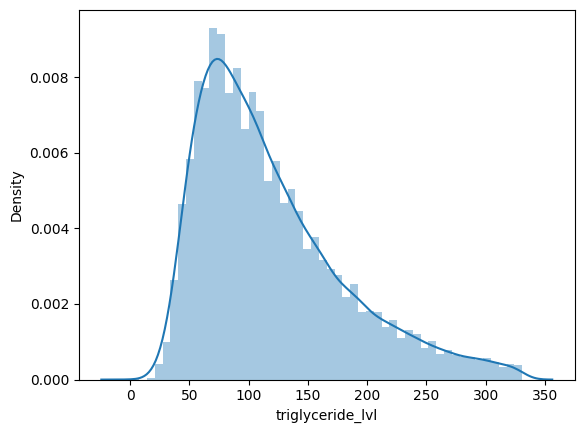

In [505]:
sns.distplot(df_train['triglyceride_lvl'])

<Axes: ylabel='triglyceride_lvl'>

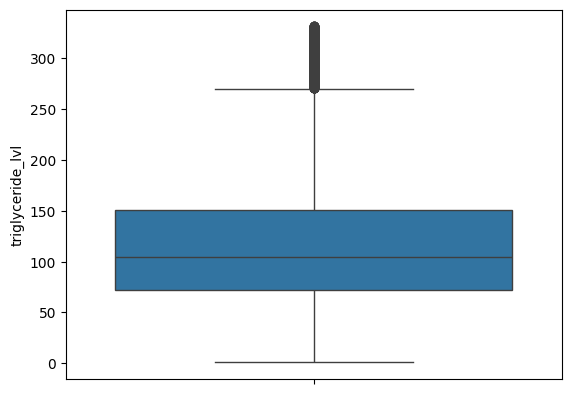

In [506]:
sns.boxplot(df_train['triglyceride_lvl'])

In [507]:
df_train.isnull().sum()

candidate_id              0
gender                    0
age                       0
height_in_cm              0
weight_in_lbs             0
left_eyesight_lvl         0
right_eyesight_lvl        0
can_hear_left_ear         0
can_hear_right_ear        0
blood_pressure_lvl1       0
blood_pressure_lvl2       0
glucose_lvl               0
total_cholestrol          0
good_cholestrol_lvl       0
bad_cholestrol_lvl        0
hemoglobin_lvl            0
urea_lvl                  0
creatinine_lvl            0
liver_enzyme_lvl1         0
liver_enzyme_lvl2      1505
smoking_habit          1449
drinking_habit         1449
residential_area          0
triglyceride_lvl          0
dtype: int64

In [508]:
df_train.triglyceride_lvl.describe()

count    21571.000000
mean       118.935886
std         61.913865
min          1.000000
25%         72.000000
50%        104.000000
75%        151.000000
max        331.000000
Name: triglyceride_lvl, dtype: float64

In [509]:
df_train.columns

Index(['candidate_id', 'gender', 'age', 'height_in_cm', 'weight_in_lbs',
       'left_eyesight_lvl', 'right_eyesight_lvl', 'can_hear_left_ear',
       'can_hear_right_ear', 'blood_pressure_lvl1', 'blood_pressure_lvl2',
       'glucose_lvl', 'total_cholestrol', 'good_cholestrol_lvl',
       'bad_cholestrol_lvl', 'hemoglobin_lvl', 'urea_lvl', 'creatinine_lvl',
       'liver_enzyme_lvl1', 'liver_enzyme_lvl2', 'smoking_habit',
       'drinking_habit', 'residential_area', 'triglyceride_lvl'],
      dtype='object')

# Data Analysis

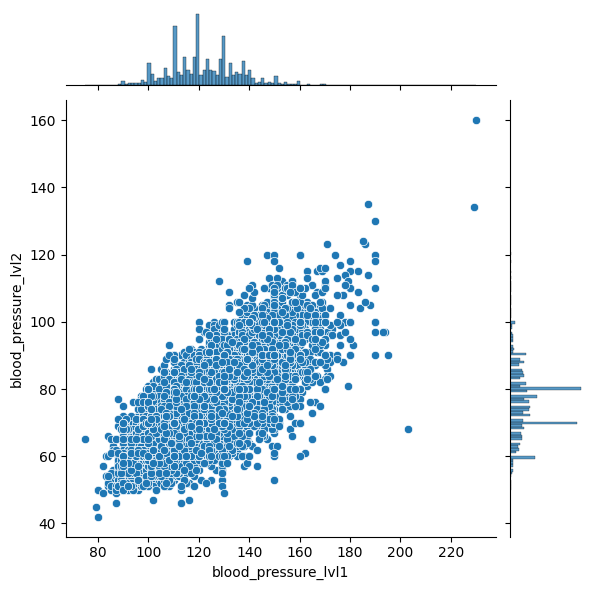

In [510]:
sns.jointplot(x=df_train['blood_pressure_lvl1'], y=df_train['blood_pressure_lvl2'])

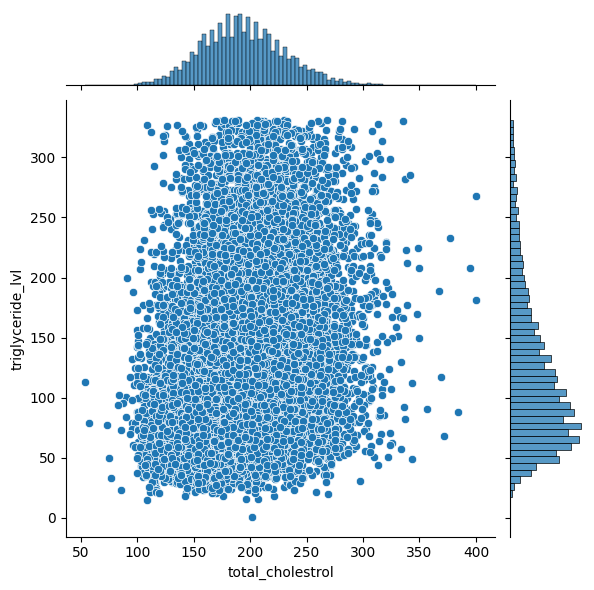

In [511]:
sns.jointplot(x=df_train['total_cholestrol'], y=df_train['triglyceride_lvl'])

<Axes: xlabel='total_cholestrol', ylabel='bad_cholestrol_lvl'>

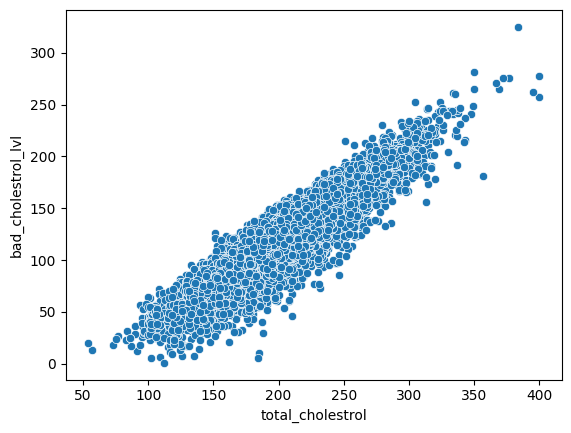

In [512]:

sns.scatterplot(y=df_train['bad_cholestrol_lvl'], x=df_train['total_cholestrol'])

<Axes: xlabel='triglyceride_lvl', ylabel='bad_cholestrol_lvl'>

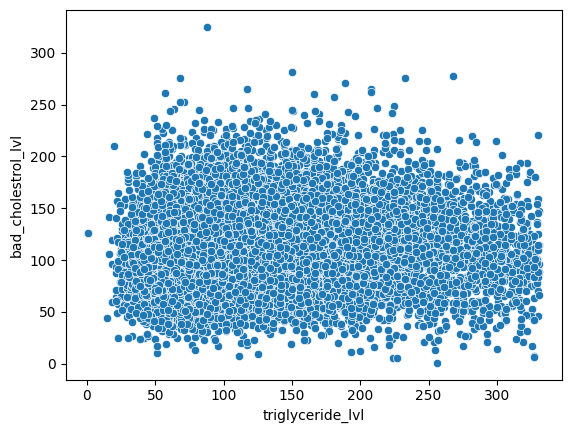

In [513]:
#bad_cholestrol_lvl

sns.scatterplot(y=df_train['bad_cholestrol_lvl'], x=df_train['triglyceride_lvl'])

<Axes: xlabel='triglyceride_lvl', ylabel='liver_enzyme_lvl2'>

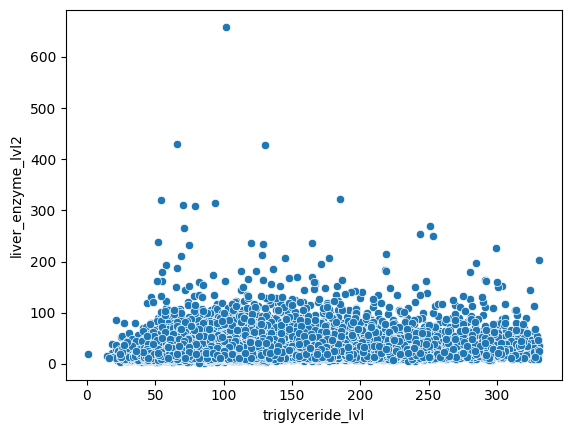

In [514]:
sns.scatterplot(y=df_train['liver_enzyme_lvl2'], x=df_train['triglyceride_lvl'])

<Axes: xlabel='triglyceride_lvl', ylabel='liver_enzyme_lvl1'>

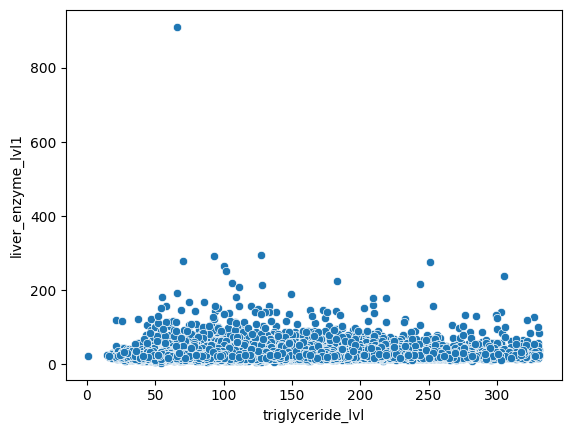

In [515]:
sns.scatterplot(y=df_train['liver_enzyme_lvl1'], x=df_train['triglyceride_lvl'])

<Axes: xlabel='liver_enzyme_lvl1', ylabel='liver_enzyme_lvl2'>

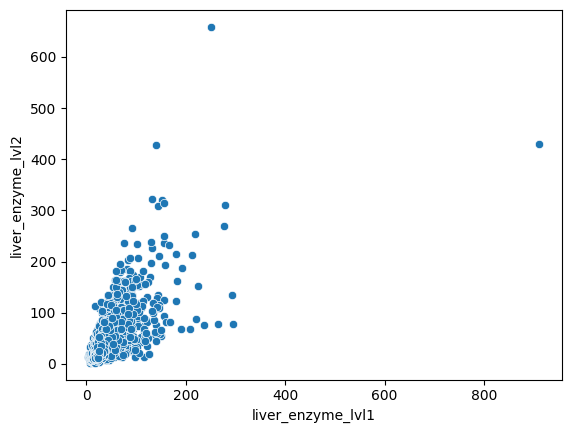

In [516]:
sns.scatterplot(y=df_train['liver_enzyme_lvl2'], x=df_train['liver_enzyme_lvl1'])

<Axes: xlabel='weight_in_lbs', ylabel='height_in_cm'>

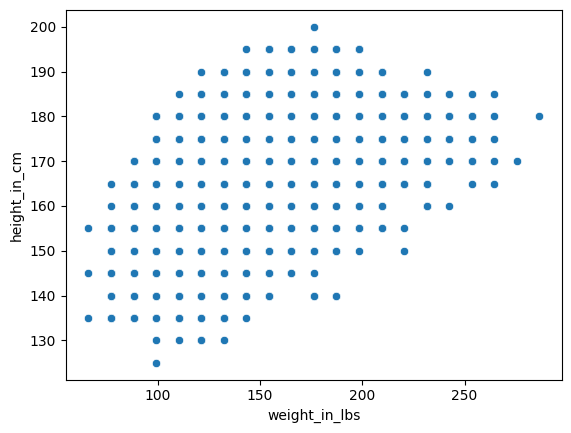

In [517]:
sns.scatterplot(y=df_train['height_in_cm'], x=df_train['weight_in_lbs'])

<Axes: xlabel='weight_in_lbs', ylabel='age'>

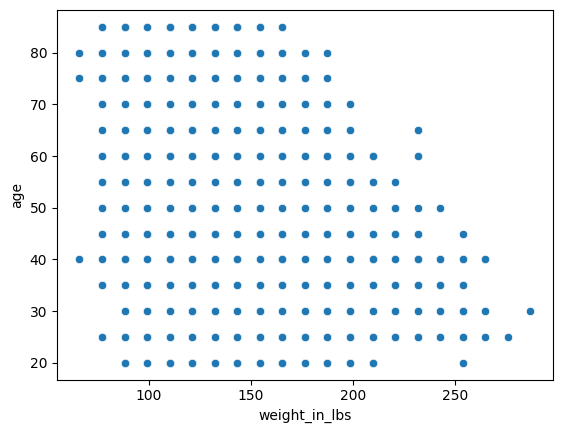

In [518]:
sns.scatterplot(y=df_train['age'], x=df_train['weight_in_lbs'])

<Axes: xlabel='height_in_cm', ylabel='age'>

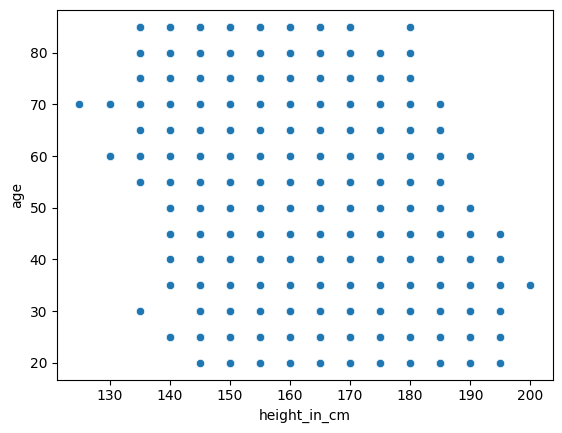

In [519]:
sns.scatterplot(y=df_train['age'], x=df_train['height_in_cm'])

<Axes: ylabel='Density'>

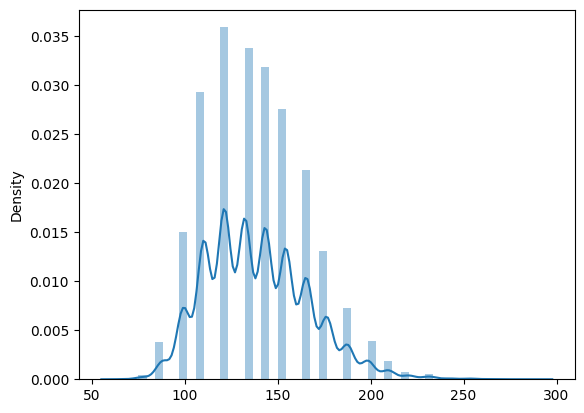

In [520]:
sns.distplot(x=df_train['weight_in_lbs'])

<Axes: ylabel='Density'>

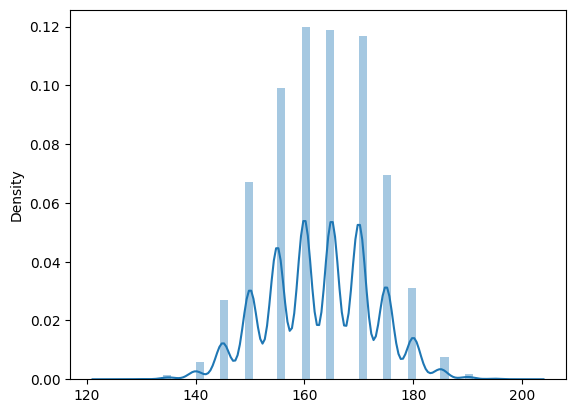

In [521]:
sns.distplot(x=df_train['height_in_cm'])

<Axes: xlabel='weight_in_lbs', ylabel='triglyceride_lvl'>

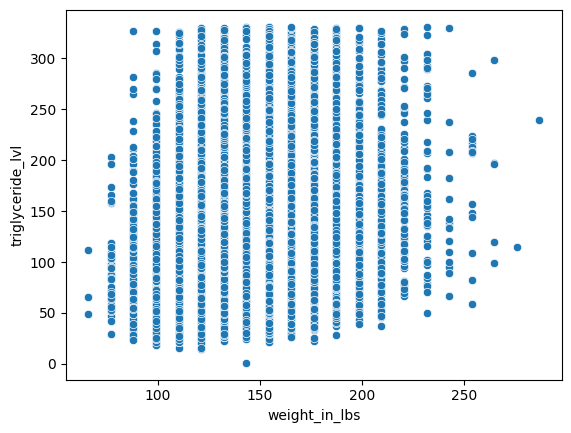

In [522]:
sns.scatterplot(y=df_train['triglyceride_lvl'], x=df_train['weight_in_lbs'])

<Axes: xlabel='height_in_cm', ylabel='triglyceride_lvl'>

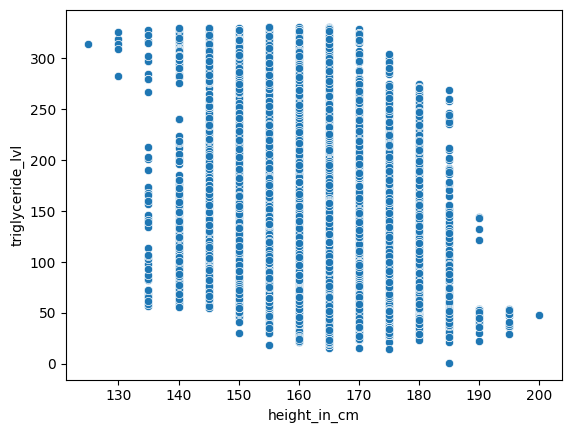

In [523]:
sns.scatterplot(y=df_train['triglyceride_lvl'], x=df_train['height_in_cm'])

# Correlation 

In [524]:
#separate variables into new data frames
numeric_data = df_train.select_dtypes(include=[np.number])
cat_data = df_train.select_dtypes(exclude=[np.number])
print ("There are {} numeric and {} categorical columns in train data".format(numeric_data.shape[1],cat_data.shape[1]))

There are 17 numeric and 7 categorical columns in train data


<Axes: >

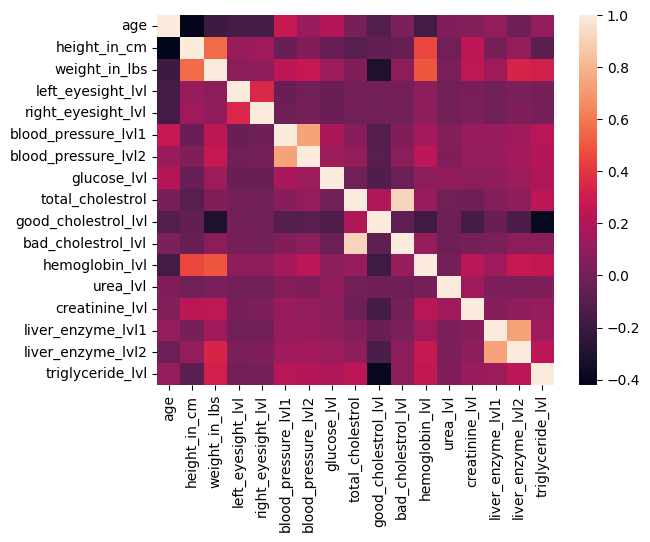

In [525]:
#correlation plot
corr = numeric_data.corr()
sns.heatmap(corr)

In [526]:
print (corr['triglyceride_lvl'].sort_values(ascending=False)[:15], '\n') 
print ('----------------------')
print (corr['triglyceride_lvl'].sort_values(ascending=False)[-5:]) 

triglyceride_lvl       1.000000
weight_in_lbs          0.315317
hemoglobin_lvl         0.258489
total_cholestrol       0.238459
liver_enzyme_lvl2      0.237017
blood_pressure_lvl1    0.219053
blood_pressure_lvl2    0.217226
glucose_lvl            0.199355
liver_enzyme_lvl1      0.132439
creatinine_lvl         0.113630
age                    0.104923
bad_cholestrol_lvl     0.079214
urea_lvl               0.036025
right_eyesight_lvl     0.007742
left_eyesight_lvl      0.006032
Name: triglyceride_lvl, dtype: float64 

----------------------
urea_lvl               0.036025
right_eyesight_lvl     0.007742
left_eyesight_lvl      0.006032
height_in_cm          -0.084944
good_cholestrol_lvl   -0.391204
Name: triglyceride_lvl, dtype: float64


# From the correaltion plot we see that correaltion is low for all the features

In [527]:
numeric_data.head()

,age,height_in_cm,weight_in_lbs,left_eyesight_lvl,right_eyesight_lvl,blood_pressure_lvl1,blood_pressure_lvl2,glucose_lvl,total_cholestrol,good_cholestrol_lvl,bad_cholestrol_lvl,hemoglobin_lvl,urea_lvl,creatinine_lvl,liver_enzyme_lvl1,liver_enzyme_lvl2,triglyceride_lvl
0,35,170,165.35,1.0,1.0,120,80,99,193,48,126,17.1,1,1.0,21,35.0,92
1,30,180,176.37,0.9,1.2,130,82,106,228,55,148,15.8,1,0.9,20,36.0,121
2,40,165,165.35,1.2,1.5,120,70,98,136,41,74,15.8,1,0.9,47,32.0,104
3,50,175,176.37,1.5,1.2,145,87,95,201,76,104,17.6,1,1.1,29,34.0,106
4,50,165,132.28,1.0,1.2,138,82,101,199,61,117,13.8,1,0.8,19,12.0,104


In [528]:

import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

data_imputed = numeric_data.apply(lambda x: x.fillna(x.mean()), axis=0)

# Calculate VIF for each numerical column
def calculate_vif(data):
    # Add a constant column to the data
    data_with_constant = add_constant(data)
    
    # Create a DataFrame to hold VIF values
    vif_data = pd.DataFrame()
    vif_data["feature"] = data.columns
    
    # Calculate VIF for each feature
    vif_data["VIF"] = [variance_inflation_factor(data_with_constant.values, i + 1)
                       for i in range(len(data.columns))]
    
    return vif_data

vif_result = calculate_vif(data_imputed )
print(vif_result)

                feature        VIF
0                   age   1.497053
1          height_in_cm   2.158162
2         weight_in_lbs   2.225256
3     left_eyesight_lvl   1.156597
4    right_eyesight_lvl   1.160776
5   blood_pressure_lvl1   2.449876
6   blood_pressure_lvl2   2.297583
7           glucose_lvl   1.123054
8      total_cholestrol  62.397801
9   good_cholestrol_lvl   9.993487
10   bad_cholestrol_lvl  53.254970
11       hemoglobin_lvl   1.576073
12             urea_lvl   1.031424
13       creatinine_lvl   1.158221
14    liver_enzyme_lvl1   2.133706
15    liver_enzyme_lvl2   2.358470
16     triglyceride_lvl   7.692775


#features have VIF values close to 1, indicating low multicollinearity. If any feature had a VIF significantly higher than 5 or 10, remove or trasform those features

In [529]:
print (corr['total_cholestrol'].sort_values(ascending=False)[:15], '\n') 
#print ('----------------------')

total_cholestrol       1.000000
bad_cholestrol_lvl     0.914255
triglyceride_lvl       0.238459
good_cholestrol_lvl    0.194066
hemoglobin_lvl         0.112770
blood_pressure_lvl2    0.105820
liver_enzyme_lvl2      0.087187
blood_pressure_lvl1    0.064402
liver_enzyme_lvl1      0.047559
weight_in_lbs          0.043867
age                    0.015807
left_eyesight_lvl      0.003835
right_eyesight_lvl    -0.006924
urea_lvl              -0.014225
glucose_lvl           -0.014420
Name: total_cholestrol, dtype: float64 



In [530]:
print (corr['good_cholestrol_lvl'].sort_values(ascending=False)[:15], '\n') 

good_cholestrol_lvl    1.000000
total_cholestrol       0.194066
left_eyesight_lvl     -0.000416
right_eyesight_lvl    -0.014519
urea_lvl              -0.025151
liver_enzyme_lvl1     -0.032072
height_in_cm          -0.059662
bad_cholestrol_lvl    -0.065982
blood_pressure_lvl2   -0.089712
blood_pressure_lvl1   -0.114499
age                   -0.120807
glucose_lvl           -0.121945
liver_enzyme_lvl2     -0.143029
creatinine_lvl        -0.159750
hemoglobin_lvl        -0.184586
Name: good_cholestrol_lvl, dtype: float64 



# total_cholesterol, good_cholesterol_lvl, and bad_cholesterol_lvl are highly correlated

In [531]:
data_reduced = data_imputed.drop(columns=['total_cholestrol'])
def calculate_vif(data):
    # Add a constant column to the data
    data_with_constant = add_constant(data)
    
    # Create a DataFrame to hold VIF values
    vif_data = pd.DataFrame()
    vif_data["feature"] = data.columns
    
    # Calculate VIF for each feature
    vif_data["VIF"] = [variance_inflation_factor(data_with_constant.values, i + 1)
                       for i in range(len(data.columns))]
    
    return vif_data

vif_result = calculate_vif(data_reduced )
print(vif_result)

                feature       VIF
0                   age  1.495710
1          height_in_cm  2.158084
2         weight_in_lbs  2.216198
3     left_eyesight_lvl  1.156577
4    right_eyesight_lvl  1.160724
5   blood_pressure_lvl1  2.449786
6   blood_pressure_lvl2  2.297272
7           glucose_lvl  1.123027
8   good_cholestrol_lvl  1.286363
9    bad_cholestrol_lvl  1.040798
10       hemoglobin_lvl  1.576073
11             urea_lvl  1.031402
12       creatinine_lvl  1.158194
13    liver_enzyme_lvl1  2.132853
14    liver_enzyme_lvl2  2.358186
15     triglyceride_lvl  1.469063


In [532]:
pivot = df_train.pivot_table(index='smoking_habit', values='triglyceride_lvl', aggfunc=np.mean)
pivot

,triglyceride_lvl
smoking_habit,
Chain Smoker,141.036265
Does not Smoke,108.142373
Occassionaly Smokes,130.662681


# We see that Triglyceride is higher for Smokers

In [533]:
pivot = df_train.pivot_table(index='drinking_habit', values='triglyceride_lvl', aggfunc=np.mean)
pivot

,triglyceride_lvl
drinking_habit,
N,114.398108
Y,123.425299


# We see that Triglyceride is higher for Drinkers

In [534]:
pivot = df_train.pivot_table(index='gender', values='triglyceride_lvl', aggfunc=np.mean)
pivot

,triglyceride_lvl
gender,
Female,103.874855
Male,132.740382


# triglyceride  is higher for Male candidates

In [535]:
pivot = df_train.pivot_table(index='smoking_habit',columns='gender', values='triglyceride_lvl', aggfunc=np.mean)
pivot

gender,Female,Male
smoking_habit,,
Chain Smoker,116.081081,143.174730
Does not Smoke,103.373469,121.122559
Occassionaly Smokes,103.765766,132.477059


# Analysis on Cholestrol feature 

In [539]:
pivot = df_train.pivot_table(index='smoking_habit',columns='gender', values='total_cholestrol', aggfunc=np.mean)
pivot

gender,Female,Male
smoking_habit,,
Chain Smoker,193.066066,195.324241
Does not Smoke,196.137844,189.786122
Occassionaly Smokes,194.247748,193.352173


In [543]:
pivot = df_train.pivot_table(index='drinking_habit',columns='gender', values='total_cholestrol', aggfunc=np.mean)
pivot

gender,Female,Male
drinking_habit,,
N,196.595414,188.224542
Y,193.894499,195.164427


In [540]:
#good_cholestrol_lvl
pivot = df_train.pivot_table(index='smoking_habit',columns='gender', values='good_cholestrol_lvl', aggfunc=np.mean)
pivot

gender,Female,Male
smoking_habit,,
Chain Smoker,63.816817,52.959599
Does not Smoke,61.816466,53.501652
Occassionaly Smokes,63.202703,53.344576


In [544]:
pivot = df_train.pivot_table(index='drinking_habit',columns='gender', values='good_cholestrol_lvl', aggfunc=np.mean)
pivot

gender,Female,Male
drinking_habit,,
N,59.956065,50.003432
Y,66.457521,54.978553


# Good cholesterol is within the optimal range for both males and females who are non-drinkers

In [541]:
#bad_cholestrol_lvl
pivot = df_train.pivot_table(index='smoking_habit',columns='gender', values='bad_cholestrol_lvl', aggfunc=np.mean)
pivot

gender,Female,Male
smoking_habit,,
Chain Smoker,105.843844,113.791045
Does not Smoke,113.539344,112.086813
Occassionaly Smokes,110.009009,113.733820


In [545]:
pivot = df_train.pivot_table(index='drinking_habit',columns='gender', values='bad_cholestrol_lvl', aggfunc=np.mean)
pivot

gender,Female,Male
drinking_habit,,
N,115.028254,112.621854
Y,108.332521,113.355448


In [548]:
train_df = df_train.copy()

In [549]:
df_train['smoking_habit'].isnull().sum()

1449

# Imputing Smoking _Habit feature based on triglycride & gender columns

In [550]:
# Male

print ("before daat imputaion ",df_train['smoking_habit'].isnull().sum())

df_train['smoking_habit'] = df_train.apply(lambda x: 'Chain Smoker' if x['gender'] == 'Male' and x['triglyceride_lvl'] >= 140 and pd.isnull(x['smoking_habit']) else x['smoking_habit'], axis=1)

df_train['smoking_habit'] = df_train.apply(lambda x: 'Occassionaly Smokes' if x['gender'] == 'Male' and x['triglyceride_lvl'] >= 130 and pd.isnull(x['smoking_habit']) else x['smoking_habit'], axis=1)

df_train['smoking_habit'] = df_train.apply(lambda x: 'Does not Smoke' if x['gender'] == 'Male' and x['triglyceride_lvl'] >= 120 and pd.isnull(x['smoking_habit']) else x['smoking_habit'], axis=1)

# Female

df_train['smoking_habit'] = df_train.apply(lambda x: 'Chain Smoker' if x['gender'] == 'Female' and x['triglyceride_lvl'] >= 115 and pd.isnull(x['smoking_habit']) else x['smoking_habit'], axis=1)

df_train['smoking_habit'] = df_train.apply(lambda x: 'Occassionaly Smokes' if x['gender'] == 'Female' and x['triglyceride_lvl'] >= 105 and pd.isnull(x['smoking_habit']) else x['smoking_habit'], axis=1)


df_train['smoking_habit'].isnull().sum()

before daat imputaion  1449


781

In [270]:
pivot = df_train.pivot_table(index='drinking_habit',columns='gender', values='triglyceride_lvl', aggfunc=np.mean)
pivot

gender,Female,Male
drinking_habit,,
N,107.570266,127.600686
Y,94.729805,135.208750


# Imputing Driniking habit column base on gender & Triglyceride columns

In [551]:
#male

print ("before daat imputaion ",df_train['drinking_habit'].isnull().sum())

df_train['drinking_habit'] = df_train.apply(lambda x: 'Y' if x['gender'] == 'Male' and x['triglyceride_lvl'] >= 135 and pd.isnull(x['drinking_habit']) else x['drinking_habit'], axis=1)

df_train['drinking_habit'] = df_train.apply(lambda x: 'N' if x['gender'] == 'Male' and x['triglyceride_lvl'] >= 125 and pd.isnull(x['drinking_habit']) else x['drinking_habit'], axis=1)

df_train['drinking_habit'] = df_train.apply(lambda x: 'Y' if x['gender'] == 'Male' and x['good_cholestrol_lvl'] >= 54 and pd.isnull(x['drinking_habit']) else x['drinking_habit'], axis=1)



# Female

df_train['drinking_habit'] = df_train.apply(lambda x: 'Y' if x['gender'] == 'Female' and x['triglyceride_lvl'] >= 107 and pd.isnull(x['drinking_habit']) else x['drinking_habit'], axis=1)

df_train['drinking_habit'] = df_train.apply(lambda x: 'N' if x['gender'] == 'Female' and x['triglyceride_lvl'] >= 95 and pd.isnull(x['drinking_habit']) else x['drinking_habit'], axis=1)

df_train['drinking_habit'] = df_train.apply(lambda x: 'Y' if x['gender'] == 'Female' and x['good_cholestrol_lvl'] >= 66 and pd.isnull(x['drinking_habit']) else x['drinking_habit'], axis=1)


df_train['drinking_habit'].isnull().sum()

before daat imputaion  1449


348

In [272]:
count_data = df_train.groupby(['gender', 'smoking_habit', 'drinking_habit']).size().reset_index(name='count')
count_data

,gender,smoking_habit,drinking_habit,count
0,Female,Chain Smoker,N,286
1,Female,Chain Smoker,Y,271
2,Female,Does not Smoke,N,6122
3,Female,Does not Smoke,Y,2630
4,Female,Occassionaly Smokes,N,145
5,Female,Occassionaly Smokes,Y,130
6,Male,Chain Smoker,N,968
7,Male,Chain Smoker,Y,3081
8,Male,Does not Smoke,N,1475
9,Male,Does not Smoke,Y,1766


In [273]:
count_data = df_train.groupby(['gender', 'smoking_habit']).size().reset_index(name='count')
count_data

,gender,smoking_habit,count
0,Female,Chain Smoker,571
1,Female,Does not Smoke,9061
2,Female,Occassionaly Smokes,282
3,Male,Chain Smoker,4171
4,Male,Does not Smoke,3371
5,Male,Occassionaly Smokes,3334


# Based on the data showing that most of the female candidates are non-smokers.

In [554]:
print (df_train['smoking_habit'].isnull().sum())
       
df_train['smoking_habit'] = df_train.apply(lambda x: 'Does not Smoke' if x['gender'] == 'Female' and pd.isnull(x['smoking_habit']) else x['smoking_habit'], axis=1)

print (df_train['smoking_habit'].isnull().sum())

781
379


In [555]:
# Analysis on missing values in test_data

In [695]:
df_test = test.copy()
count_data = df_test.groupby(['gender', 'smoking_habit']).size().reset_index(name='count')
count_data

,gender,smoking_habit,count
0,Female,Chain Smoker,133
1,Female,Does not Smoke,3970
2,Female,Occassionaly Smokes,118
3,Male,Chain Smoker,1809
4,Male,Does not Smoke,1444
5,Male,Occassionaly Smokes,1477


In [696]:
df_test.isnull().sum()

candidate_id             0
gender                   0
age                      0
height_in_cm             0
weight_in_lbs            0
left_eyesight_lvl        0
right_eyesight_lvl       0
can_hear_left_ear        0
can_hear_right_ear       0
blood_pressure_lvl1      0
blood_pressure_lvl2      0
glucose_lvl              0
total_cholestrol         0
good_cholestrol_lvl      0
bad_cholestrol_lvl       0
hemoglobin_lvl           0
urea_lvl                 0
creatinine_lvl           0
liver_enzyme_lvl1        0
liver_enzyme_lvl2      607
smoking_habit          649
drinking_habit         672
residential_area         0
dtype: int64

In [697]:
pivot = df_test.pivot_table(index='drinking_habit',columns='gender', values='good_cholestrol_lvl', aggfunc=np.mean)
pivot

gender,Female,Male
drinking_habit,,
N,59.731205,49.595361
Y,66.665138,54.205388


In [698]:

print (df_test['drinking_habit'].isnull().sum())

df_test['drinking_habit'] = df_test.apply(lambda x: 'Y' if x['gender'] == 'Male' and x['good_cholestrol_lvl'] >= 54and pd.isnull(x['drinking_habit']) else x['drinking_habit'], axis=1)

df_test['drinking_habit'] = df_test.apply(lambda x: 'Y' if x['gender'] == 'Female' and x['good_cholestrol_lvl'] >= 66 and pd.isnull(x['drinking_habit']) else x['drinking_habit'], axis=1)

print (df_test['drinking_habit'].isnull().sum())

672
392


In [561]:
print (df_test['smoking_habit'].isnull().sum())
       
df_test['smoking_habit'] = df_test.apply(lambda x: 'Does not Smoke' if x['gender'] == 'Female' and pd.isnull(x['smoking_habit']) else x['smoking_habit'], axis=1)

print (df_test['smoking_habit'].isnull().sum())

649
344


In [275]:
count_data = df_train.groupby(['gender',  'drinking_habit']).size().reset_index(name='count')
count_data

,gender,drinking_habit,count
0,Female,N,6816
1,Female,Y,3145
2,Male,N,3550
3,Male,Y,7308


In [276]:
pivot = df_train.pivot_table(index='residential_area', values='triglyceride_lvl', aggfunc=np.mean)
pivot

,triglyceride_lvl
residential_area,
Rural,119.180137
Town,118.917546
Urban,118.712922


# Excessive alcohol consumption can lead to liver damage and elevated liver enzymes

In [277]:
pivot = df_train.pivot_table(index='drinking_habit',columns='gender',values='liver_enzyme_lvl2', aggfunc=np.mean)
pivot

gender,Female,Male
drinking_habit,,
N,20.778338,29.322951
Y,19.129275,29.822419


In [567]:
pivot = df_train.pivot_table(index='smoking_habit',columns='gender',values='liver_enzyme_lvl1', aggfunc=np.mean)
pivot

gender,Female,Male
smoking_habit,,
Chain Smoker,24.252189,27.332294
Does not Smoke,23.504914,27.203500
Occassionaly Smokes,23.053191,27.725555


<Axes: xlabel='liver_enzyme_lvl1', ylabel='Density'>

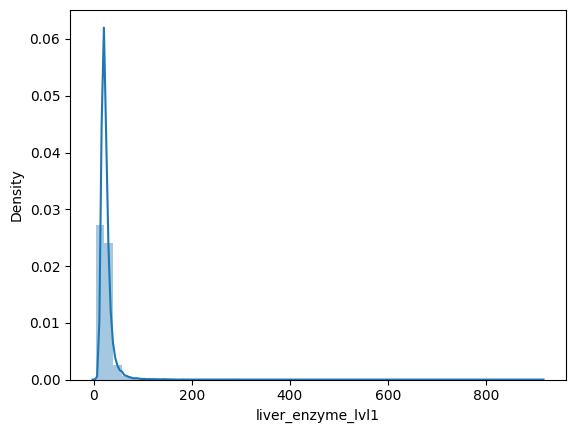

In [278]:
sns.distplot(df_train['liver_enzyme_lvl1'])

In [279]:
df_train['liver_enzyme_lvl1'].describe()

count    21571.000000
mean        25.529693
std         14.642787
min          4.000000
25%         19.000000
50%         23.000000
75%         28.000000
max        911.000000
Name: liver_enzyme_lvl1, dtype: float64

<Axes: xlabel='liver_enzyme_lvl2', ylabel='Density'>

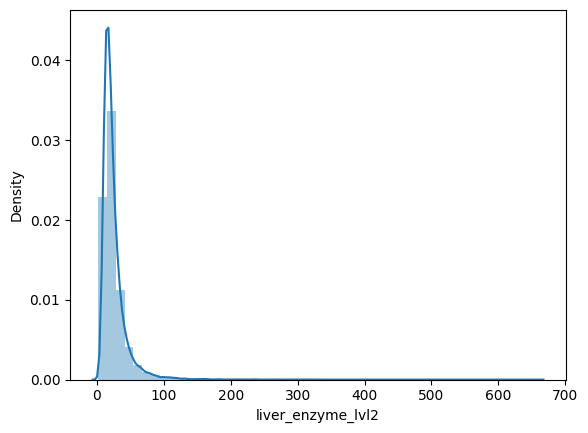

In [280]:
sns.distplot(df_train['liver_enzyme_lvl2'])

In [281]:
df_train['liver_enzyme_lvl2'].describe()

count    20066.000000
mean        25.065982
std         20.020120
min          2.000000
25%         14.000000
50%         20.000000
75%         29.000000
max        659.000000
Name: liver_enzyme_lvl2, dtype: float64

<Axes: xlabel='liver_enzyme_lvl1', ylabel='Density'>

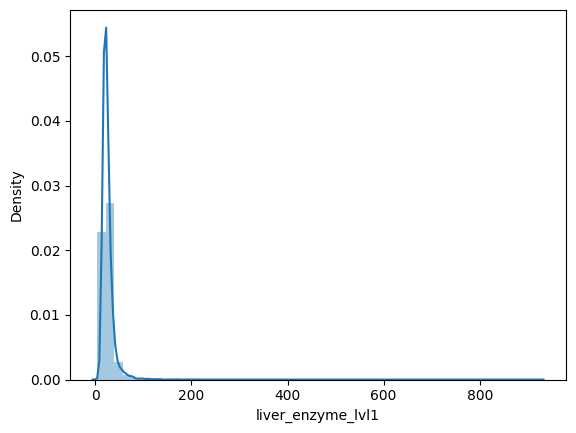

In [563]:
sns.distplot(df_test['liver_enzyme_lvl1'])

<Axes: xlabel='liver_enzyme_lvl2', ylabel='Density'>

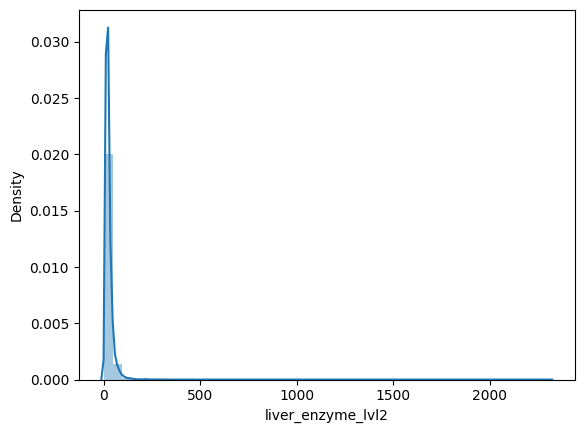

In [564]:
sns.distplot(df_test['liver_enzyme_lvl2'])

# According to medical guidelines, liver enzyme levels are within the range of 10 to 70 for 99% of the population. Based on this, we can drop outlier values.

In [ ]:
pivot = df_train.pivot_table(index='drinking_habit',columns='gender',values='liver_enzyme_lvl2', aggfunc=np.mean)
pivot

In [572]:
Q1 = df_train['liver_enzyme_lvl2'].quantile(0.25)
Q3 = df_train['liver_enzyme_lvl2'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 2 * IQR
upper_bound = Q3 + 2 * IQR

print (lower_bound,upper_bound)

-16.0 59.0


In [573]:
Q1 = df_filtered['liver_enzyme_lvl1'].quantile(0.25)
Q3 = df_filtered['liver_enzyme_lvl1'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 2 * IQR
upper_bound = Q3 + 2 * IQR

print (lower_bound,upper_bound)

1.0 46.0


In [576]:
# Drop outliers

df_fil = df_train.copy()
print ("before droping putliers",df_fil.shape)
df_fil = df_fil[(df_fil['liver_enzyme_lvl1']  < 200) ]
#df_fil = df_fil[(df_fil['liver_enzyme_lvl2']  < 200) ]
print ("after droping putliers",df_fil.shape)

before droping putliers (21571, 24)
after droping putliers (21558, 24)


In [571]:
# # Drop outliers on test data

# df_fil_test = df_test.copy()
# print ("before droping outliers ",df_fil_test.shape)
# df_fil_test = df_fil_test[ (df_fil_test['liver_enzyme_lvl1']  < 200) ]
# #df_fil = df_fil[(df_fil['liver_enzyme_lvl2']  < 200) ]
# print ("after droping putliers",df_fil_test.shape)

before droping df_fil_testputliers (9600, 23)
after droping putliers (9588, 23)


In [578]:
print ("before droping putliers",df_fil.shape)


df_no_outlier = df_fil[(df_fil['liver_enzyme_lvl2'].isnull()) | ((df_fil['liver_enzyme_lvl2'] >= -10) & (df_fil['liver_enzyme_lvl2'] <= 200))]

#df_fil = df_fil[(df_fil['liver_enzyme_lvl2'] >= -10) & (df_fil['liver_enzyme_lvl2'] <= 200)]

print (" droping putliers",df_no_outlier.shape)

before droping putliers (21558, 24)
 droping putliers (21540, 24)


In [579]:
# print ("before droping putliers",df_fil_test.shape)


# df_test_no_outlier = df_fil_test[(df_fil_test['liver_enzyme_lvl2'].isnull()) | ((df_fil_test['liver_enzyme_lvl2'] >= -10) & (df_fil_test['liver_enzyme_lvl2'] <= 200))]

# #df_fil = df_fil[(df_fil['liver_enzyme_lvl2'] >= -10) & (df_fil['liver_enzyme_lvl2'] <= 200)]

# print (" droping putliers",df_test_no_outlier.shape)

before droping putliers (9588, 23)
 droping putliers (9572, 23)


In [582]:
# Train data
mean_value = df_no_outlier['liver_enzyme_lvl2'].mean()
df_no_outlier['liver_enzyme_lvl2'].fillna(mean_value, inplace=True)

# Test data

# mean_value = df_test_no_outlier['liver_enzyme_lvl2'].mean()
# df_test_no_outlier['liver_enzyme_lvl2'].fillna(mean_value, inplace=True)

<Axes: xlabel='liver_enzyme_lvl2', ylabel='Density'>

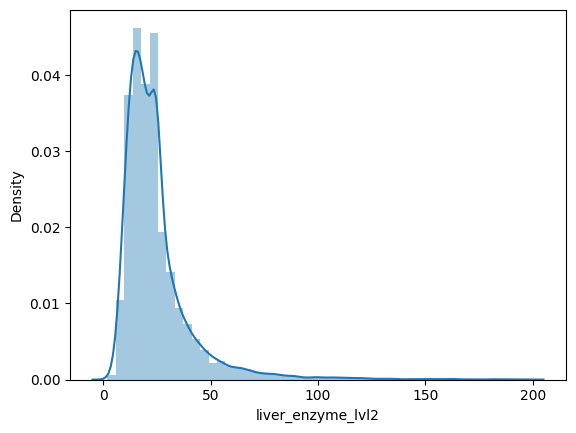

In [581]:
sns.distplot(df_no_outlier['liver_enzyme_lvl2'])

<Axes: xlabel='liver_enzyme_lvl2', ylabel='Density'>

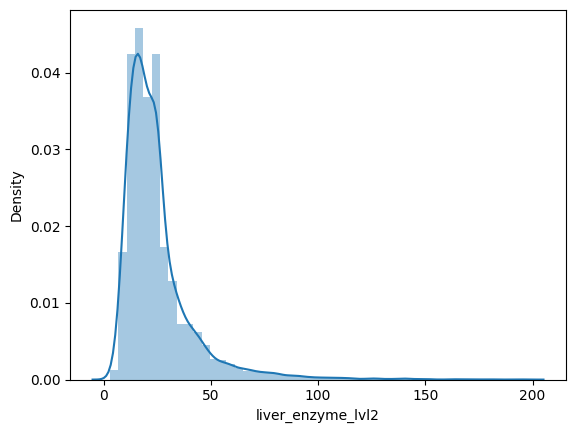

In [584]:
sns.distplot(df_test_no_outlier['liver_enzyme_lvl2'])

In [586]:
train_data = df_no_outlier.copy()
smoking_mode = train_data['smoking_habit'].mode()[0]
train_data['smoking_habit'].fillna(smoking_mode, inplace=True)

# # Mode imputation for 'drinking_habit'
drinking_mode = train_data['drinking_habit'].mode()[0]
train_data['drinking_habit'].fillna(drinking_mode, inplace=True)

In [699]:
test_data = df_test.copy()
smoking_mode = test_data['smoking_habit'].mode()[0]
test_data['smoking_habit'].fillna(smoking_mode, inplace=True)

# # Mode imputation for 'drinking_habit'
drinking_mode = test_data['drinking_habit'].mode()[0]
test_data['drinking_habit'].fillna(drinking_mode, inplace=True)

In [588]:


# #train_data = df_train.copy()
# smoking_mode = train_data['smoking_habit'].mode()[0]
# train_data['smoking_habit'].fillna(smoking_mode, inplace=True)

# # Mode imputation for 'drinking_habit'
# drinking_mode = train_data['drinking_habit'].mode()[0]
# train_data['drinking_habit'].fillna(drinking_mode, inplace=True)

In [746]:
#Assigning and dividing the dataset
# X = df_fil.drop('triglyceride_lvl',axis=1)
# y=df_fil['triglyceride_lvl
X = train_data.copy()

X = train_data.drop('triglyceride_lvl',axis=1)
y= train_data['triglyceride_lvl']

In [747]:
#del X[['candidate_id','can_hear_left_ear','can_hear_right_ear']]
X.drop(['candidate_id','can_hear_left_ear','can_hear_right_ear','residential_area'], axis=1, inplace=True)

#X.drop(['candidate_id'], axis=1, inplace=True)

In [748]:
X.head()

,gender,age,height_in_cm,weight_in_lbs,left_eyesight_lvl,right_eyesight_lvl,blood_pressure_lvl1,blood_pressure_lvl2,glucose_lvl,total_cholestrol,good_cholestrol_lvl,bad_cholestrol_lvl,hemoglobin_lvl,urea_lvl,creatinine_lvl,liver_enzyme_lvl1,liver_enzyme_lvl2,smoking_habit,drinking_habit
0,Male,35,170,165.35,1.0,1.0,120,80,99,193,48,126,17.1,1,1.0,21,35.0,Does not Smoke,Y
1,Male,30,180,176.37,0.9,1.2,130,82,106,228,55,148,15.8,1,0.9,20,36.0,Chain Smoker,N
2,Male,40,165,165.35,1.2,1.5,120,70,98,136,41,74,15.8,1,0.9,47,32.0,Does not Smoke,N
3,Male,50,175,176.37,1.5,1.2,145,87,95,201,76,104,17.6,1,1.1,29,34.0,Does not Smoke,N
4,Male,50,165,132.28,1.0,1.2,138,82,101,199,61,117,13.8,1,0.8,19,12.0,Does not Smoke,N


In [749]:
# categorical_columns = X.select_dtypes(include=['object']).columns

# # Create dummy variables for each categorical column
# dummy_variables = pd.get_dummies(X[categorical_columns], prefix=categorical_columns)

# # Concatenate the dummy variables with the original DataFrame
# df_with_dummies = pd.concat([X, dummy_variables], axis=1)

# df_with_dummies.head()

In [732]:
#X_train_data = df_with_dummies.drop(columns=categorical_columns)

In [733]:
#X_train_data.head()

,age,height_in_cm,weight_in_lbs,left_eyesight_lvl,right_eyesight_lvl,blood_pressure_lvl1,blood_pressure_lvl2,glucose_lvl,total_cholestrol,good_cholestrol_lvl,...,can_hear_right_ear_Highly Defective,can_hear_right_ear_Slightly Defective,smoking_habit_Chain Smoker,smoking_habit_Does not Smoke,smoking_habit_Occassionaly Smokes,drinking_habit_N,drinking_habit_Y,residential_area_Rural,residential_area_Town,residential_area_Urban
0,35,170,165.35,1.0,1.0,120,80,99,193,48,...,False,True,False,True,False,False,True,False,True,False
1,30,180,176.37,0.9,1.2,130,82,106,228,55,...,False,True,True,False,False,True,False,False,False,True
2,40,165,165.35,1.2,1.5,120,70,98,136,41,...,False,True,False,True,False,True,False,True,False,False
3,50,175,176.37,1.5,1.2,145,87,95,201,76,...,False,True,False,True,False,True,False,False,True,False
4,50,165,132.28,1.0,1.2,138,82,101,199,61,...,False,True,False,True,False,True,False,False,False,True


In [750]:
X.isnull().sum()

gender                 0
age                    0
height_in_cm           0
weight_in_lbs          0
left_eyesight_lvl      0
right_eyesight_lvl     0
blood_pressure_lvl1    0
blood_pressure_lvl2    0
glucose_lvl            0
total_cholestrol       0
good_cholestrol_lvl    0
bad_cholestrol_lvl     0
hemoglobin_lvl         0
urea_lvl               0
creatinine_lvl         0
liver_enzyme_lvl1      0
liver_enzyme_lvl2      0
smoking_habit          0
drinking_habit         0
dtype: int64

In [752]:
#X_train = pd.get_dummies(X, columns=['smoking_habit'])

X_train = pd.get_dummies(X, columns=['smoking_habit'])

X_train ['gender'] = X_train ['gender'].map({'Male': 1, 'Female': 0})
X_train ['drinking_habit'] = X_train ['drinking_habit'].map({'Y': 1, 'N': 0})

X_train.head()

,gender,age,height_in_cm,weight_in_lbs,left_eyesight_lvl,right_eyesight_lvl,blood_pressure_lvl1,blood_pressure_lvl2,glucose_lvl,total_cholestrol,...,bad_cholestrol_lvl,hemoglobin_lvl,urea_lvl,creatinine_lvl,liver_enzyme_lvl1,liver_enzyme_lvl2,drinking_habit,smoking_habit_Chain Smoker,smoking_habit_Does not Smoke,smoking_habit_Occassionaly Smokes
0,1,35,170,165.35,1.0,1.0,120,80,99,193,...,126,17.1,1,1.0,21,35.0,1,False,True,False
1,1,30,180,176.37,0.9,1.2,130,82,106,228,...,148,15.8,1,0.9,20,36.0,0,True,False,False
2,1,40,165,165.35,1.2,1.5,120,70,98,136,...,74,15.8,1,0.9,47,32.0,0,False,True,False
3,1,50,175,176.37,1.5,1.2,145,87,95,201,...,104,17.6,1,1.1,29,34.0,0,False,True,False
4,1,50,165,132.28,1.0,1.2,138,82,101,199,...,117,13.8,1,0.8,19,12.0,0,False,True,False


In [753]:

x_train, x_test, y_train, y_test = train_test_split(X_train, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(x_train, y_train)

#Make predictions
y_pred = model.predict(x_test)

# Evaluate the model using Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 9.885425010167376


# Test Data

In [700]:
#X_text = test_data.drop(['candidate_id','can_hear_left_ear','can_hear_right_ear','residential_area'], axis=1, inplace=True)

X_text = test_data.drop(['candidate_id'], axis=1, inplace=True)



In [701]:
X_test = pd.get_dummies(test_data, columns=['smoking_habit'])

X_test ['gender'] = X_test ['gender'].map({'Male': 1, 'Female': 0})
X_test ['drinking_habit'] = X_test ['drinking_habit'].map({'Y': 1, 'N': 0})


mean_value = X_test['liver_enzyme_lvl2'].mean()
X_test['liver_enzyme_lvl2'].fillna(mean_value, inplace=True)

X_test.head()

,gender,age,height_in_cm,weight_in_lbs,left_eyesight_lvl,right_eyesight_lvl,blood_pressure_lvl1,blood_pressure_lvl2,glucose_lvl,total_cholestrol,...,bad_cholestrol_lvl,hemoglobin_lvl,urea_lvl,creatinine_lvl,liver_enzyme_lvl1,liver_enzyme_lvl2,drinking_habit,smoking_habit_Chain Smoker,smoking_habit_Does not Smoke,smoking_habit_Occassionaly Smokes
0,0,50,155,121.25,1.2,0.9,140.0,90.0,121.0,230.0,...,158.0,14.0,1.0,0.7,16.0,13.0,0,False,True,False
1,0,40,165,132.28,1.0,0.9,135.0,77.0,122.0,167.0,...,68.0,15.1,1.0,0.7,14.0,16.0,1,False,True,False
2,0,40,155,99.21,0.9,1.2,100.0,70.0,92.0,160.0,...,78.0,10.8,1.0,0.6,17.0,9.0,0,False,True,False
3,1,50,175,176.37,1.5,1.5,128.0,80.0,122.0,171.0,...,80.0,15.6,1.0,1.0,25.0,47.0,1,False,False,True
4,1,45,180,143.30,1.0,1.0,130.0,80.0,104.0,160.0,...,55.0,14.9,1.0,1.1,32.0,17.0,1,True,False,False


In [702]:
len (X_test)

9600

In [703]:
predictions = model.predict(X_test)

In [704]:
Submission1=pd.DataFrame()
Submission1['candidate_id']=df_test['candidate_id']
Submission1["triglyceride_lvl"]=predictions

In [705]:

Submission1.head()

,candidate_id,triglyceride_lvl
0,CAN_22401,116.329759
1,CAN_22402,86.768533
2,CAN_22403,51.005550
3,CAN_22404,205.899050
4,CAN_22405,178.099763


In [706]:
Submission1.to_csv('out4.csv',index = False)

In [707]:
## Logistic Regression
from sklearn.linear_model import LogisticRegression

x_train, x_test, y_train, y_test = train_test_split(X_train_data, y, test_size=0.2, random_state=42)
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

# Predicting Test Set
y_pred = log_reg.predict(x_test)
#from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
# acc = accuracy_score(y_test, y_pred)
# prec = precision_score(y_test, y_pred)
# rec = recall_score(y_test, y_pred)
# f1 = f1_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print ("Mean Absolute Error (MAE):", mae)
# results = pd.DataFrame([['Logistic Regression', acc, prec, rec, f1]],
#                columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
# print(results)

Mean Absolute Error (MAE): 26.645543175487465


In [708]:
predictions = log_reg.predict(X_test)

In [709]:
len (predictions)

9600

In [710]:
Submission1=pd.DataFrame()
Submission1['candidate_id']=df_test['candidate_id']
Submission1["triglyceride_lvl"]=predictions
Submission1.head()

,candidate_id,triglyceride_lvl
0,CAN_22401,109
1,CAN_22402,56
2,CAN_22403,54
3,CAN_22404,162
4,CAN_22405,199


In [712]:
Submission1.to_csv('log_reg1.csv',index   = False)

In [714]:
import xgboost as xgb



X_train, X_test, y_train, y_test = train_test_split(X_train_data, y, test_size=0.2, random_state=42)
xgb_reg = xgb.XGBRegressor(objective ='reg:squarederror', 
                           colsample_bytree = 0.3, 
                           learning_rate = 0.1,
                           max_depth = 5, 
                           alpha = 10, 
                           n_estimators = 10)

# Predicting Test Set

xgb_reg.fit(X_train, y_train)

y_pred_xgb = xgb_reg.predict(X_test)


mae = mean_absolute_error(y_test, y_pred_xgb)
print ("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 40.971074122904405


# liner regression produces better results